In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = pd.read_csv(filepath_or_buffer = "/users/Liz/Downloads/beisbol.csv")
datos.head()

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [6]:
datos = datos.drop(columns=[datos.columns[0], 'equipos'])

In [8]:
X = datos[['bateos']]
y = datos['runs']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred = modelo.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 5219.975632116472
R2: -0.5174837911123824


In [13]:
param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(f"Mejores parámetros: {grid.best_params_}")

Mejores parámetros: {'fit_intercept': True}


In [14]:
best_model.fit(X_train, y_train)
y_pred_opt = best_model.predict(X_test)
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2_opt = r2_score(y_test, y_pred_opt)
print(f"MSE optimizado: {mse_opt}")
print(f"R2 optimizado: {r2_opt}")

MSE optimizado: 5219.975632116472
R2 optimizado: -0.5174837911123824


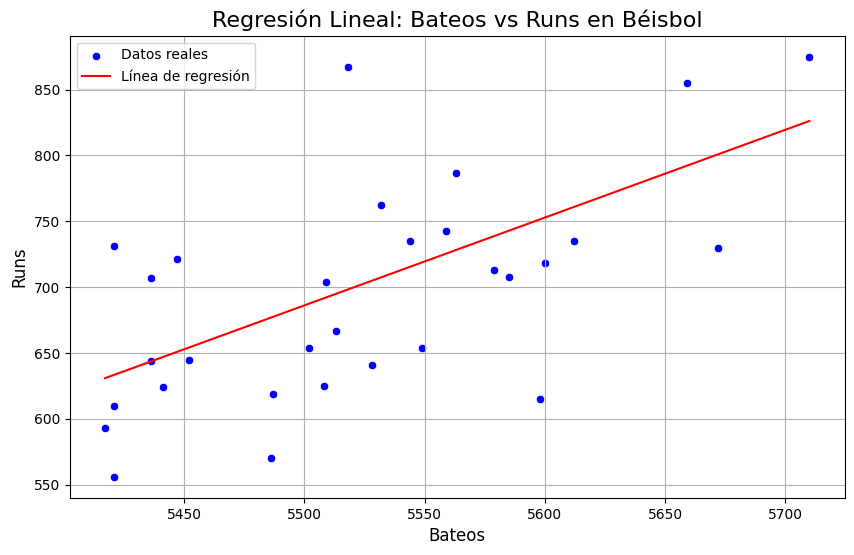

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['bateos'], y=y, color='blue', label='Datos reales')
sns.lineplot(x=X['bateos'], y=best_model.predict(X), color='red', label='Línea de regresión')
plt.title('Regresión Lineal: Bateos vs Runs en Béisbol', fontsize=16)
plt.xlabel('Bateos', fontsize=12)
plt.ylabel('Runs', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()